
![logo](http://qcodes.github.io/Qcodes/_images/qcodes_logo.png)

<td> <img src="https://avatars3.githubusercontent.com/u/548266?s=400&v=4" align="left" style="width: 200px;"/> </td>
<td> <img src="https://avatars3.githubusercontent.com/u/23165537?s=400&v=4" align="left" style="width: 200px;"/> </td>
<td> <img src="https://avatars3.githubusercontent.com/u/30660470?s=400&v=4" align="right"  style="width: 200px;"/> </td>
<td> <img src="https://avatars2.githubusercontent.com/u/15662810?s=400&v=4" align="right"  style="width: 200px;"/> </td>

<br /> <br /> <br /> 
<p><center><b><font size="+2">QCo</b></font>penhagen<b><font size="+2">De</b></font>lft<b><font size="+2">S</b>ydney</b></font> </center></p>


<center>
Python-based data acquisition framework developed by the Copenhagen / Delft / Sydney / Microsoft quantum computing consortium.
</center>

<h2><center> Why another control software? </center></h2>

<h3><center> Igor Pro is fun, why change? </center></h3>

* Version control.
* Readability.
* Flexibility.
* Reproducibility.
* Easy data handling.




It is aiming for a common framework for physics experiments [1]:

> * New students don’t need to spend a long time learning software in order to participate in experiments.
> * One has to write their own code only for pieces that are very specific to their own experiment.
> * Code can and should be contributed back to the framework.
> * The process of moving between teams or labs, and of setting up a new experiment is streamlined.
> * Physics experiments can take advantage of modern software and best practices.

With some key features [2]:
> * A more flexible and faster data storage solution.
> * A robust architecture that uses the full potential of your hardware.



[1]: [<http://qcodes.github.io/Qcodes/>](http://qcodes.github.io/Qcodes/)

[2]: [<https://github.com/QCoDeS/Qcodes>](https://github.com/QCoDeS/Qcodes)

## Why I use it

(Because I gave up fighting with Igor...)

* Python based - many other python packages are readily available (i.e. scipy, scikit-learn, Keras, StatsModels).
* Responsive and competent development team.
* Takes care of saving all relevant parameters, i.e state of instruments.
* Data saved in SQlite database:
  * convenient data storage,
  * search functions,
  * enables to save and search metadata (i.e labels),
  * cross-platform.


### The SQlite database

* Replaces ```fopen()```.
* File format, not server/client database.
* Widely used (successfully as it seems).

> SQLite emphasizes economy, efficiency, reliability, independence, and simplicity. [1]

[1]: [<https://www.sqlite.org/index.html>](https://www.sqlite.org/index.html)

## Installations

* Instructions can be found [here](http://qcodes.github.io/Qcodes/start/index.html#installation).
* Using Anaconda to manage environments is recommended.
* Preferable to install all packages with ```conda```, not mixing ```pip``` and ```conda```.
* To install latest release:
    * launch Anaconda Prompt
    * type
        ```sh
        conda env create -f environment.yml
        activate qcodes
        pip install qcodes
        ```
* Or install from GitHub:
    * clone repo from [https://github.com/QCoDeS/Qcodes](https://github.com/QCoDeS/Qcodes)
    * create environment with editable install
        ```sh
        conda env create -f <path-to-environment.yml>
        activate qcodes
        pip install -e <path-to-repository>
        ```
        
* To use instrument drivers you will also need [National Instruments VISA](https://www.ni.com/visa/).

### Using QCoDeS

* Jupyter notebook
* or Spyder


## Structure

![](http://qcodes.github.io/Qcodes/_images/datasetdiagram.svg)

More details [here](http://qcodes.github.io/Qcodes/dataset/dataset_design.html).

In [1]:
import numpy as np
import qcodes as qc

from qcodes.dataset.experiment_container import new_experiment
from qcodes.dataset.database import initialise_database
from qcodes.tests.instrument_mocks import DummyInstrument
from qcodes.dataset.param_spec import ParamSpec
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id

# Prepare a mock setup with two instruments
dac = DummyInstrument('dac', gates=['ch1', 'ch2'])
dmm = DummyInstrument('dmm', gates=['v1', 'v2'])
# We are going to measure dmm.v1.
dmm.v1.get = np.random.randn

# Bind everything to a station - important for metadata.
station = qc.Station(dmm, dac)

In [2]:
# We assume we don't have a databse right now.
initialise_database()

# Each dataset taken will belong to an experiment.
# Here we create a new one in our newly created database
new_experiment(name='tutorial_exp', sample_name="no sample")

tutorial_exp#no sample#20@/Users/jana/equs/__equs__.Python/day-3-community-day/qcodes/experiments.db
----------------------------------------------------------------------------------------------------

Starting experimental run with id: 24


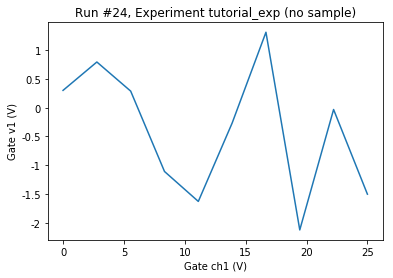

In [3]:
# We are now ready to run the experiment.
meas = Measurement()
# All we need to do is to subsribe all parameters involved.
meas.register_parameter(dac.ch1)  # register the first independent parameter
meas.register_parameter(dmm.v1, setpoints=(dac.ch1,))  # register the dependent one
meas.write_period = 2

with meas.run() as datasaver:
    for set_v in np.linspace(0, 25, 10):
        dac.ch1.set(set_v)
        get_v = dmm.v1.get()
        datasaver.add_result((dac.ch1, set_v),
                             (dmm.v1, get_v))   
    # Retain the current data ID for plotting
    dataid = datasaver.run_id

# Plot the data
axs, cbar = plot_by_id(dataid)

Check out interdependent parameters in the [documentation](http://qcodes.github.io/Qcodes/dataset/interdependentparams.html). It explains how to use ```inferred_from``` and ```depends_on``` when registering parameters.

## Real instruments

For a list of implemented drivers see [here](https://github.com/QCoDeS/Qcodes/tree/master/qcodes/instrument_drivers).

* Most of them talk VISA.
* Initialize with name and communication address, i.e:
    ```python
    from qcodes.instrument_drivers.Keysight.Keysight_E8267D import Keysight_E8267D
    my_signal_generator = Keysight_E8267D('my_signal_generator', 'TCPIP::192.168.0.11::inst0::INSTR')
    ```
 * unique instrument names

In [4]:
from qcodes.instrument_drivers.Keysight.Keysight_E8267D import Keysight_E8267D
??Keysight_E8267D

### Useful tool: The [monitor](https://github.com/QCoDeS/Qcodes/tree/master/qcodes/monitor)

* run ```python <path-to-qcodes>/qcodes/monitor/monitor.py```
* an launch in python with ```qc.Monitor(*listofparamterstomonitor)```

In [7]:
listofparamterstomonitor = [dac.ch1]
qc.Monitor(*listofparamterstomonitor)

<Monitor(Thread-4, started 123145433395200)>

Most important ingredients for measurement recipes, all living [here](https://github.com/QCoDeS/Qcodes/tree/master/qcodes):

A) Instruments:
  * qcodes.station
  * qcodes.instrument_drivers, see [docs](http://qcodes.github.io/Qcodes/api/generated/qcodes.instrument_drivers.html)

B) Data, see [docs](http://qcodes.github.io/Qcodes/dataset/index.html#):
  * qcodes.dataset.data_set
  * qcodes.dataset.experiment_container
  * qcodes.dataset.measurements
  * qcodes.instrument.parameter


Do not use the ```qcodes.data``` and ```qcodes.Loop```:
* not flexible
* deprecated

[x] Version control.

[x] Readability.

[ ] Flexibility : [some examples](https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/DataSet/Dataset%20Context%20Manager.ipynb)

[ ] Reproducibility.

[ ] Easy data handling.


## Reproducibility


__Metadata__

* Station snapshot - all relevant parameter values saved along with the data.
* Metadata, i.e labels.

In [5]:
from qcodes.dataset.experiment_container import load_by_id

ds = load_by_id(dataid)
ds.snapshot

{'station': {'instruments': {'dmm': {'functions': {},
    'submodules': {},
    '__class__': 'qcodes.tests.instrument_mocks.DummyInstrument',
    'parameters': {'IDN': {'value': {'vendor': None,
       'model': 'dmm',
       'serial': None,
       'firmware': None},
      'ts': '2019-02-01 09:37:18',
      'raw_value': {'vendor': None,
       'model': 'dmm',
       'serial': None,
       'firmware': None},
      '__class__': 'qcodes.instrument.parameter.Parameter',
      'full_name': 'dmm_IDN',
      'label': 'IDN',
      'inter_delay': 0,
      'instrument': 'qcodes.tests.instrument_mocks.DummyInstrument',
      'instrument_name': 'dmm',
      'vals': '<Anything>',
      'post_delay': 0,
      'name': 'IDN',
      'unit': ''},
     'v1': {'value': 0,
      'ts': '2019-02-01 09:37:18',
      'raw_value': 0,
      '__class__': 'qcodes.instrument.parameter.Parameter',
      'full_name': 'dmm_v1',
      'label': 'Gate v1',
      'inter_delay': 0,
      'instrument': 'qcodes.tests.instrume

In [6]:
# Get the data
print("Parameters:")
print(ds.get_parameters)
x = ds.get_data("dac_ch1")
y = ds.get_data("dmm_v1")

print("Data:")
print(x)
print(y)


Parameters:
<bound method DataSet.get_parameters of results #24@/Users/jana/equs/__equs__.Python/day-3-community-day/qcodes/experiments.db
--------------------------------------------------------------------------------------
dac_ch1 - numeric
dmm_v1 - numeric>
Data:
[[0], [2.77777777777778], [5.55555555555556], [8.33333333333333], [11.1111111111111], [13.8888888888889], [16.6666666666667], [19.4444444444444], [22.2222222222222], [25]]
[[0.300369844712249], [0.793285651538948], [0.287522208859902], [-1.10814298512899], [-1.6281852154817], [-0.267480239502096], [1.31009273747729], [-2.12319041965242], [-0.0318081422007192], [-1.50227223050112]]


## Easy data handling

* datasets grouped by experiments
* run ID
* unique ID - GUID:
    * format '12345678-1234-1234-1234-123456789abc'
    * encoding location, works station and time
    * location and work station specified in qcodes [configuration file](http://qcodes.github.io/Qcodes/user/configuration.html)
* searchable database 

In [8]:
ds.guid

'aaaaaaaa-0000-0000-0000-0168a5e31e31'

### Check out the database

With [DB Browser for SQLite](https://sqlitebrowser.org/).
![](./db_viewer_screenshot.png)

## Where to start

### Examples

Up to date examples are in [Qcodes/docs/examples/DataSet](https://github.com/QCoDeS/Qcodes/tree/master/docs/examples/DataSet).

* Go-to notebook when setting up measurements: [Dataset Context Manager](https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/DataSet/Dataset%20Context%20Manager.ipynb).
* Details about QCoDes setup, database and experiments: [The Experiment Container](https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/DataSet/The%20Experiment%20Container.ipynb).
* How to run sweeps: [Implementing doND using the dataset](https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/DataSet/Implementing_doND_using_the_dataset.ipynb).
* Useful when digging deeper: [Paramtypes explained](https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/DataSet/Paramtypes%20explained.ipynb).

### Get in touch

* Send email to the core developers (emails in their GitHub commits).
* Sign up for the Slack channel by sending an email to Jens.

## For advanced users

* Check out the [Station Configurator](https://github.com/qdev-dk/qdev-wrappers/blob/master/qdev_wrappers/station_configurator.py).
* Keen to contribute? See [instructions](https://github.com/QCoDeS/Qcodes/blob/master/CONTRIBUTING.rst) and get started!